# Task-assessment
 The dataset is used for this competition is synthetic but based on a real dataset (in this case, the actual Titanic data!) and generated using a CTGAN. The   statistical properties of this dataset are very similar to the original Titanic dataset, but there's no way to "cheat" by using public labels for           predictions. 
  The data has been split into two groups: training set and test set.

# Data quality assessment

- Import necessary libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [9]:
sin_tit = pd.read_csv("train.csv")
sin_tit.head(11)

PassengerId  Survived  Pclass               Name     Sex    Age  SibSp  \
0             0         1       1   Oconnor, Frankie    male    NaN      2   
1             1         0       3        Bryan, Drew    male    NaN      0   
2             2         0       3     Owens, Kenneth    male   0.33      1   
3             3         0       3      Kramer, James    male  19.00      0   
4             4         1       3      Bond, Michael    male  25.00      0   
5             5         0       2  Sassano, Jonathan    male  35.00      0   
6             6         0       3       Conway, Jose    male   7.00      0   
7             7         1       3      Werner, Linda  female   6.00      1   
8             8         0       1   Wardlaw, Michael    male  27.00      2   
9             9         0       2       Greigo, Rudy    male  66.00      0   
10           10         0       3   Nichols, William    male  31.00      0   

    Parch     Ticket   Fare   Cabin Embarked  
0       0     209245  27.14  C12239        S  
1       0      27323  13.35     NaN        S  
2       2  CA 457703  71.29     NaN        S  
3       0   A. 10866  13.04     NaN        S  
4       0     427635   7.76     NaN        S  
5       0      13363   6.71     NaN        S  
6       0       A/5    9.77     NaN        S  
7       2     434426  31.50     NaN        S  
8       1     474849  73.02   A7253        S  
9       0       6981   9.14   D2969        C  
10      0     459690   8.06     NaN        S

In [10]:
print(f'The Data-Set Contain {sin_tit.shape[0]} Rows and {sin_tit.shape[1]} Columns')

The Data-Set Contain 100000 Rows and 12 Columns


# Data exploration

- Data description and data cleaning
1) Main features 
2) Data type
3) Null, missing-value?

- Attributes:
1) PassengerId - continuous   
2) Survived - 0 = No, 1 = Yes
3) Pclass - 1st = Upper, 2nd = Middle, 3rd = Lower
4) name - nominal 
5) sex - Female, Male 
6) age - continius
7) SibSp - Sibling = brother, sister, stepbrother, stepsister, Spouse = husband, wife (mistresses and fiancés were ignored)
8) Parch - Parent = mother, father, Child = daughter, son, stepdaughter, stepson, some children travelled only with a nanny, therefore parch=0 for them.
9) Ticket - continuous
10) Fare - continuous
11) Cabin - continuous 
12) Embarked - C = Cherbourg, Q = Queenstown, S = Southampton


In [11]:
sin_tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


In [12]:
print(sin_tit['PassengerId'].unique())

[    0     1     2 ... 99997 99998 99999]


In [13]:
print(sin_tit['Survived'].unique())

[1 0]


In [14]:
print(sin_tit['Pclass'].unique())

[1 3 2]


In [15]:
print(sin_tit['Name'].unique())

['Oconnor, Frankie' 'Bryan, Drew' 'Owens, Kenneth' ...
 'Childress, Charles' 'Caughlin, Thomas' 'Enciso, Tyler']


In [16]:
print(sin_tit['Sex'].unique())

['male' 'female']


In [17]:
print(sin_tit['Age'].unique())

[     nan 3.30e-01 1.90e+01 2.50e+01 3.50e+01 7.00e+00 6.00e+00 2.70e+01
 6.60e+01 3.10e+01 6.00e+01 3.60e+01 5.00e+01 4.40e+01 5.70e+01 5.30e+01
 4.30e+01 6.10e+01 1.70e+01 3.90e+01 5.90e+01 2.30e+01 2.10e+01 2.60e+01
 5.00e+00 6.70e+01 5.40e+01 6.90e+01 2.20e+01 6.80e+01 7.10e+01 6.30e+01
 4.70e+01 4.50e+01 3.40e+01 3.00e+00 2.80e+01 3.70e+01 6.40e+01 5.80e+01
 5.60e+01 4.00e+01 3.80e+01 2.00e+01 8.00e+00 7.00e+01 1.10e+01 4.90e+01
 5.20e+01 4.80e+01 4.10e+01 3.20e+01 6.20e+01 5.50e+01 6.50e+01 4.60e+01
 2.00e+00 4.20e+01 2.90e+01 5.10e+01 1.40e+01 2.40e+01 3.00e+01 3.30e+01
 1.80e+01 7.90e+01 1.20e+01 9.00e+00 8.30e-01 1.00e+00 1.50e+01 5.00e-01
 1.00e+01 7.20e+01 2.45e+01 7.70e+01 7.30e+01 4.00e+00 7.50e-01 1.60e+01
 8.00e+01 1.30e+01 7.40e+01 2.65e+01 5.45e+01 7.50e+01 3.65e+01 7.60e+01
 9.20e-01 4.25e+01 8.00e-02 4.20e-01 4.95e+01 2.25e+01 1.25e+01 7.55e+01
 8.10e+01 2.35e+01 2.75e+01 7.80e+01 1.35e+01 6.70e-01 4.35e+01 2.50e-01
 5.80e-01 5.75e+01 2.95e+01 5.95e+01 8.40e+01 3.95e

In [18]:
print(sin_tit['SibSp'].unique())

[2 0 1 3 4 8 5]


In [19]:
print(sin_tit['Parch'].unique())

[0 2 1 4 3 5 6 9]


In [20]:
print(sin_tit['Ticket'].unique())

['209245' '27323' 'CA 457703' ... 'PC 15008' '458654' '458074']


In [21]:
print(sin_tit['Fare'].unique())

[ 27.14  13.35  71.29 ... 246.1  225.51   4.06]


In [22]:
print(sin_tit['Cabin'].unique())

['C12239' nan 'A7253' ... 'D12975' 'F12072' 'D17243']


In [23]:
print(sin_tit['Embarked'].unique())

['S' 'C' 'Q' nan]


In [24]:
sin_tit.describe()

PassengerId       Survived         Pclass           Age  \
count  100000.000000  100000.000000  100000.000000  96708.000000   
mean    49999.500000       0.427740       2.106910     38.355472   
std     28867.657797       0.494753       0.837727     18.313556   
min         0.000000       0.000000       1.000000      0.080000   
25%     24999.750000       0.000000       1.000000     25.000000   
50%     49999.500000       0.000000       2.000000     39.000000   
75%     74999.250000       1.000000       3.000000     53.000000   
max     99999.000000       1.000000       3.000000     87.000000   

               SibSp          Parch         Fare  
count  100000.000000  100000.000000  99866.00000  
mean        0.397690       0.454560     43.92933  
std         0.862566       0.950076     69.58882  
min         0.000000       0.000000      0.68000  
25%         0.000000       0.000000     10.04000  
50%         0.000000       0.000000     24.46000  
75%         1.000000       1.000000     33.50000  
max         8.000000       9.000000    744.66000

- N-values

In [25]:
for col in sin_tit.columns:
    pct_missing = sin_tit[col].isnull().sum()
    print(f'{col} - {pct_missing :.1%}')

PassengerId - 0.0%
Survived - 0.0%
Pclass - 0.0%
Name - 0.0%
Sex - 0.0%
Age - 329200.0%
SibSp - 0.0%
Parch - 0.0%
Ticket - 462300.0%
Fare - 13400.0%
Cabin - 6786600.0%
Embarked - 25000.0%


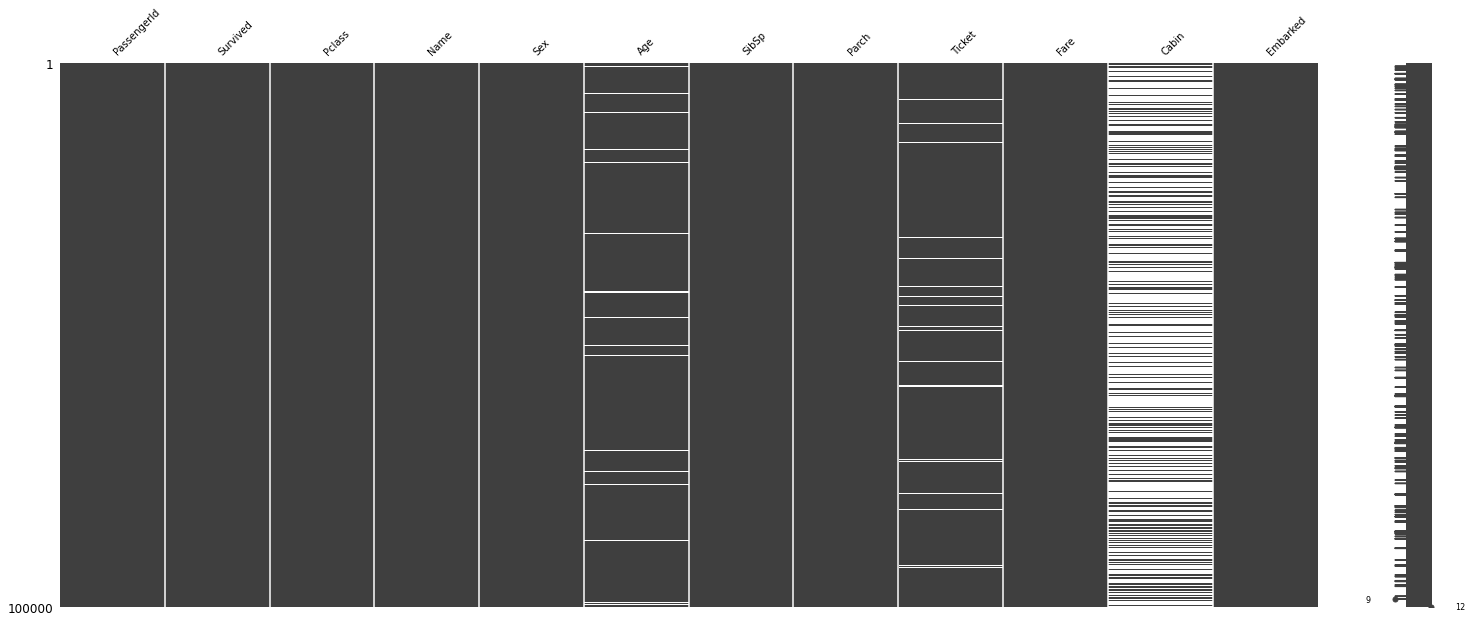

In [26]:
msno.matrix(sin_tit, fontsize = 10)
plt.show()

In [27]:
sin_tit.isna().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age             3292
SibSp              0
Parch              0
Ticket          4623
Fare             134
Cabin          67866
Embarked         250
dtype: int64

In [28]:
sin_tit['Fare']=sin_tit.groupby('Pclass')['Fare'].transform(lambda group:group.fillna(group.mean()))

In [29]:
sin_tit['Age']=sin_tit.groupby('Sex')['Age'].transform(lambda group:group.fillna(group.mean()))

In [30]:
sin_tit.drop(columns = ['Ticket'],axis = 1)

PassengerId  Survived  Pclass                Name     Sex        Age  \
0                0         1       1    Oconnor, Frankie    male  37.030884   
1                1         0       3         Bryan, Drew    male  37.030884   
2                2         0       3      Owens, Kenneth    male   0.330000   
3                3         0       3       Kramer, James    male  19.000000   
4                4         1       3       Bond, Michael    male  25.000000   
...            ...       ...     ...                 ...     ...        ...   
99995        99995         1       2         Bell, Adele  female  62.000000   
99996        99996         0       2       Brown, Herman    male  66.000000   
99997        99997         0       3  Childress, Charles    male  37.000000   
99998        99998         0       3    Caughlin, Thomas    male  51.000000   
99999        99999         0       3       Enciso, Tyler    male  55.000000   

       SibSp  Parch   Fare   Cabin Embarked  
0          2      0  27.14  C12239        S  
1          0      0  13.35     NaN        S  
2          1      2  71.29     NaN        S  
3          0      0  13.04     NaN        S  
4          0      0   7.76     NaN        S  
...      ...    ...    ...     ...      ...  
99995      0      0  14.86  D17243        C  
99996      0      0  11.15     NaN        S  
99997      0      0   9.95     NaN        S  
99998      0      1  30.92     NaN        S  
99999      0      0  13.96     NaN        S  

[100000 rows x 11 columns]

In [31]:
sin_tit.drop(columns = ['Cabin'],axis = 1)

PassengerId  Survived  Pclass                Name     Sex        Age  \
0                0         1       1    Oconnor, Frankie    male  37.030884   
1                1         0       3         Bryan, Drew    male  37.030884   
2                2         0       3      Owens, Kenneth    male   0.330000   
3                3         0       3       Kramer, James    male  19.000000   
4                4         1       3       Bond, Michael    male  25.000000   
...            ...       ...     ...                 ...     ...        ...   
99995        99995         1       2         Bell, Adele  female  62.000000   
99996        99996         0       2       Brown, Herman    male  66.000000   
99997        99997         0       3  Childress, Charles    male  37.000000   
99998        99998         0       3    Caughlin, Thomas    male  51.000000   
99999        99999         0       3       Enciso, Tyler    male  55.000000   

       SibSp  Parch     Ticket   Fare Embarked  
0          2      0     209245  27.14        S  
1          0      0      27323  13.35        S  
2          1      2  CA 457703  71.29        S  
3          0      0   A. 10866  13.04        S  
4          0      0     427635   7.76        S  
...      ...    ...        ...    ...      ...  
99995      0      0   PC 15008  14.86        C  
99996      0      0      13273  11.15        S  
99997      0      0        NaN   9.95        S  
99998      0      1     458654  30.92        S  
99999      0      0     458074  13.96        S  

[100000 rows x 11 columns]

In [32]:
sin_tit['Age'] = sin_tit['Age'].astype(int)

# Data visualizations

- 2.1 Uni-variate Analysis

In [33]:
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px

In [34]:
fig =  plt.figure(figsize = (15,6))
fig.patch.set_facecolor('#f5f6f6')    

<Figure size 1080x432 with 0 Axes>

In [35]:
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.2,hspace= 0.2)

In [36]:
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

In [37]:
axes=[ax0,ax1,ax2,ax3,ax4,ax5]
for ax in axes:
    ax.set_facecolor('#f5f6f6')
    ax.tick_params(axis='x', labelsize = 12, which = 'major', direction = 'out',pad = 2, length = 1.5)
    ax.tick_params(axis='y', colors= 'black')
    ax.axes.get_yaxis().set_visible(False)
    
for loc in ['left', 'right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)

In [38]:
cols = sin_tit.select_dtypes(exclude = 'object').columns
sns.kdeplot(x = sin_tit[cols[1]],color="green",fill=True,ax = ax0)
sns.kdeplot(x = sin_tit[cols[2]],color="red",fill=True,ax = ax1)
sns.kdeplot(x = sin_tit[cols[3]],color="blue",fill=True,ax = ax2)
sns.kdeplot(x = sin_tit[cols[4]],color="black",fill=True,ax = ax3)
sns.kdeplot(x = sin_tit[cols[5]],color="pink",fill=True,ax = ax4)
sns.kdeplot(x = sin_tit[cols[6]],color="green",fill=True,ax = ax5)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

In [39]:
fig.text(0.2,0.98,"Univariate Analysis on Numerical Columns:",**{'font':'serif', 'size':18,'weight':'bold'}, alpha = 1)

Text(0.2, 0.98, 'Univariate Analysis on Numerical Columns:')

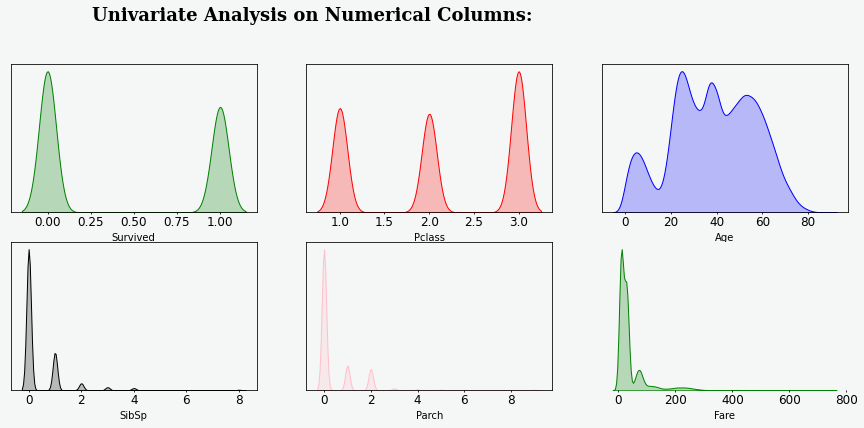

In [40]:
fig

/home/olga/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



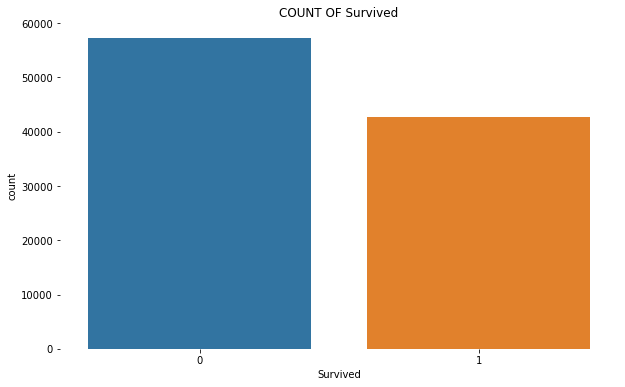

In [66]:
fig=plt.figure(figsize=(10,6))
ax=sns.countplot(sin_tit["Survived"])
plt.title("COUNT OF Survived")

for loc in ['left', 'right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)

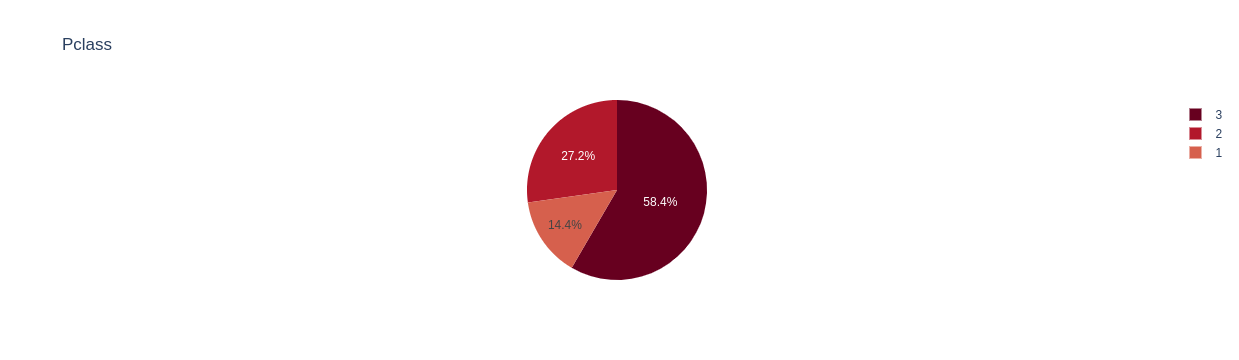

In [51]:
Pclass=sin_tit["Pclass"].reset_index()
px.pie(values=sin_tit["Pclass"],names=sin_tit["Pclass"], color_discrete_sequence=px.colors.sequential.RdBu,title='Pclass')

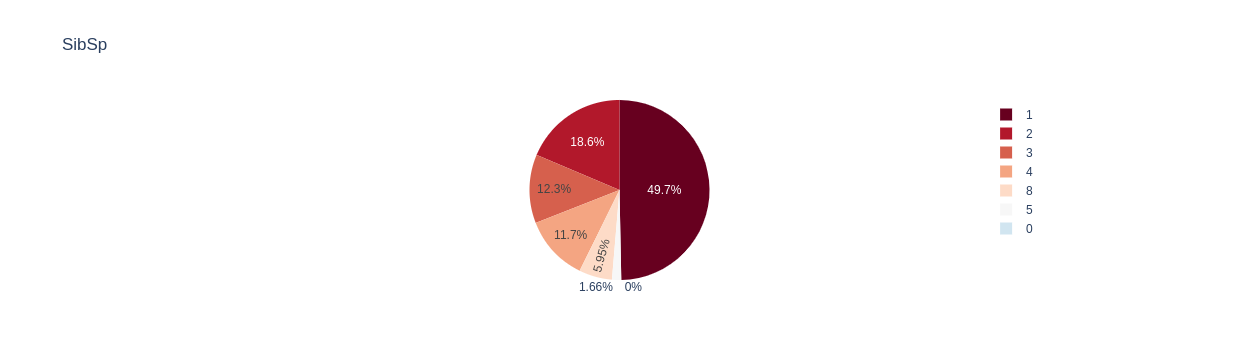

In [57]:
Sib=sin_tit["SibSp"].reset_index()
px.pie(values=sin_tit["SibSp"],names=sin_tit["SibSp"], color_discrete_sequence=px.colors.sequential.RdBu,title='SibSp')

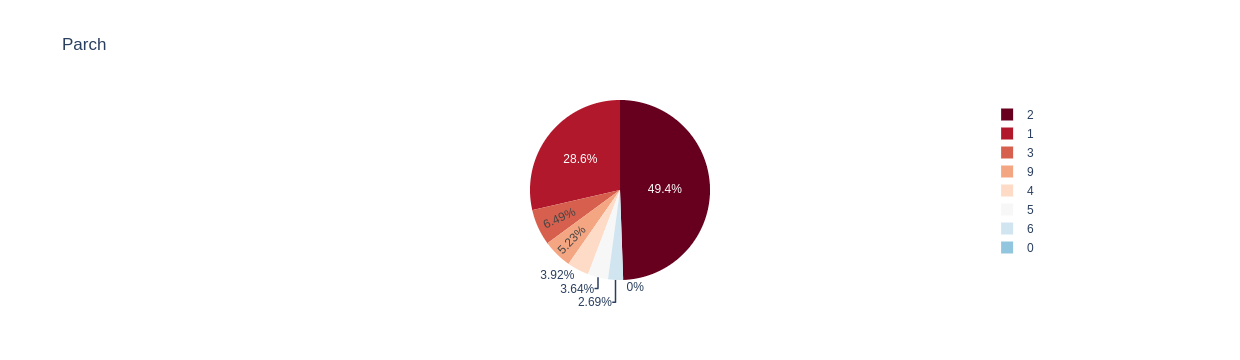

In [58]:
Parch=sin_tit["Parch"].reset_index()
px.pie(values=sin_tit["Parch"],names=sin_tit["Parch"], color_discrete_sequence=px.colors.sequential.RdBu,title='Parch')

In [ ]:
Sib=sin_tit["SibSp"].reset_index()
px.pie(values=sin_tit["SibSp"],names=sin_tit[""], color_discrete_sequence=px.colors.sequential.RdBu,title='Fare')

- 2.2 Distribution of survived with Pclass

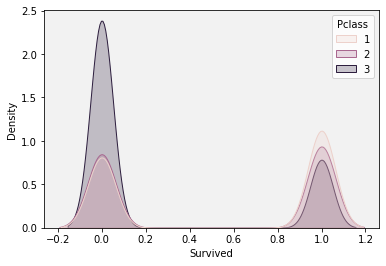

In [67]:
ax=sns.kdeplot(x=sin_tit["Survived"],hue=sin_tit["Pclass"],fill=True)
ax.set_facecolor('#f2f2f2')

- Distribution of survived with Sex

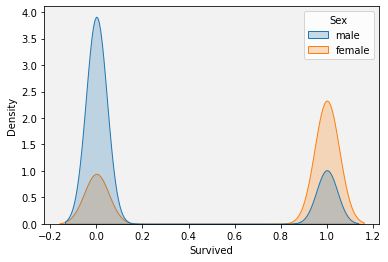

In [69]:
ax=sns.kdeplot(x=sin_tit["Survived"],hue=sin_tit["Sex"],fill=True)
ax.set_facecolor('#f2f2f2')

- Distribution of Pclass with Sex

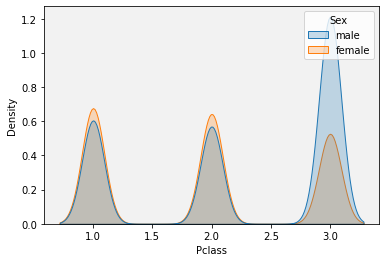

In [43]:
ax=sns.kdeplot(x=sin_tit["Pclass"],hue=sin_tit["Sex"],fill=True)
ax.set_facecolor('#f2f2f2')

<AxesSubplot:xlabel='Age', ylabel='Density'>

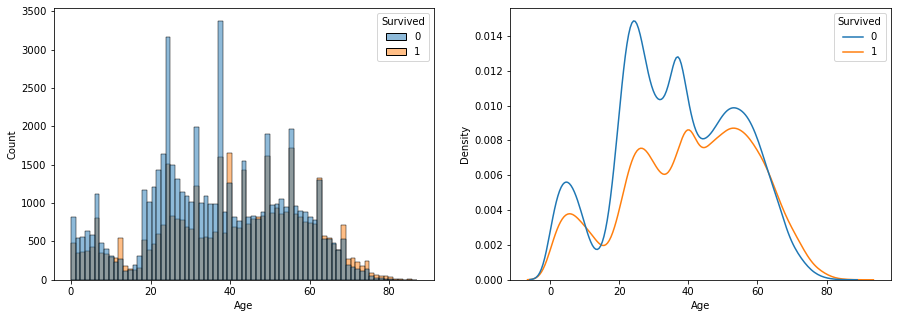

In [47]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data=sin_tit, x="Age", hue="Survived")
plt.subplot(1,2,2)
sns.kdeplot(data=sin_tit, x="Age", hue="Survived")

<AxesSubplot:xlabel='Fare', ylabel='Density'>

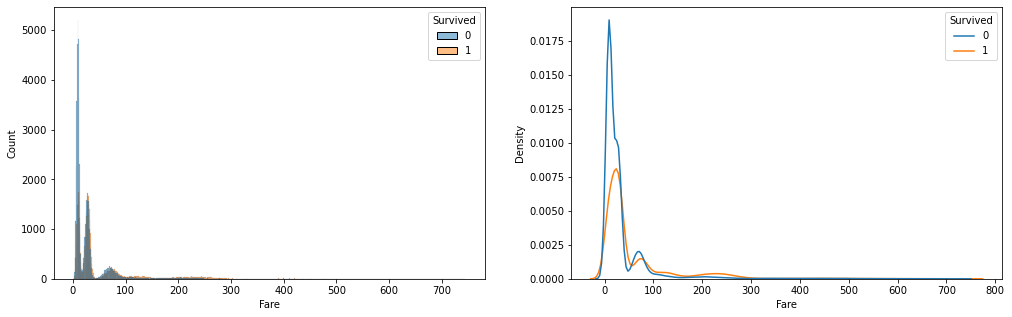

In [49]:
plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
sns.histplot(data=sin_tit, x="Fare", hue="Survived")
plt.subplot(1,2,2)
sns.kdeplot(data=sin_tit, x="Fare", hue="Survived")

<AxesSubplot:xlabel='SibSp', ylabel='Age'>

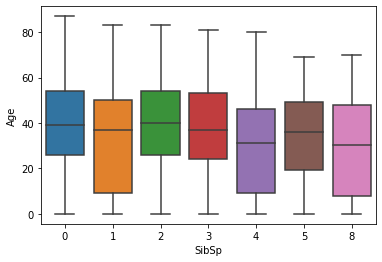

In [52]:
sns.boxplot(data=sin_tit, x="SibSp", y="Age")

<AxesSubplot:xlabel='SibSp', ylabel='Fare'>

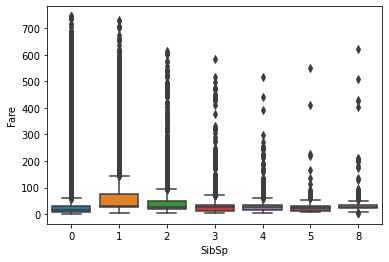

In [53]:
sns.boxplot(data=sin_tit, x="SibSp", y="Fare")

<AxesSubplot:>

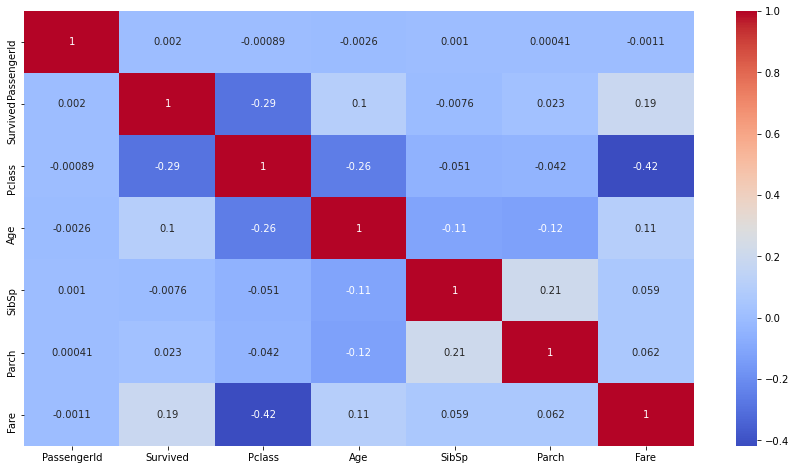

In [54]:
plt.figure(figsize=(15,8))
sns.heatmap(sin_tit.corr(), annot=True, cmap="coolwarm")